<a href="https://colab.research.google.com/github/hchenaisi/Python_learning/blob/main/Chapter2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Chapter 2, Supervised Learning
In supervised learning, we want to build a model on the training data and then be able to make accurate predictions on new, unseen data that has the same characteristics as the training set that we used.

     |████████████████████████████████| 540 kB 26.7 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582637 sha256=1b68cc486b4113a14f7526a65eeb24335a0eefa8c9b671b895a8eefd9d2fca20
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


X.shape: (26, 2)


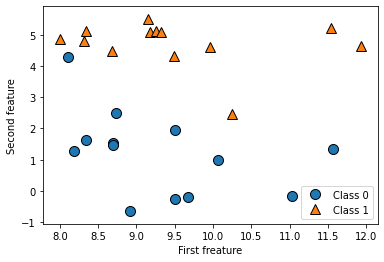

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
!pip install mglearn
import mglearn

# generate dataset
X, y = mglearn.datasets.make_forge()
mglearn.discrete_scatter(X[:,0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First freature")
plt.ylabel("Second feature")
print("X.shape: {}".format(X.shape))

Text(0, 0.5, 'Target')

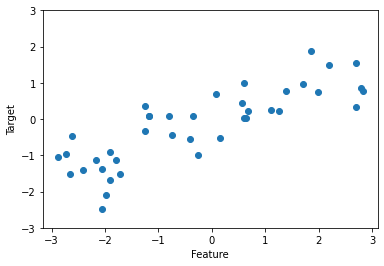

In [3]:
X,y=mglearn.datasets.make_wave(n_samples=40)
plt.plot(X,y,'o')
plt.ylim(-3,3)
plt.xlabel("Feature")
plt.ylabel("Target")

In [11]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("canver.keys():\n{}".format(cancer.keys()))
print("Shape of cancer data: {}".format(cancer.data.shape))  # 569 data points and 30 featuresp

canver.keys():
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
Shape of cancer data: (569, 30)


In [14]:
print("Sample counts per class:".format(
    {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))

Sample counts per class:


In [15]:
print("Feature names:\n{}".format(cancer.feature_names))

Feature names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [16]:
from sklearn.datasets import load_boston
boston = load_boston()
print("Data shape: {}".format(boston.data.shape))

Data shape: (506, 13)


In [17]:
X,y = mglearn.datasets.load_extended_boston()
print("X.shape: {}".format(X.shape))

X.shape: (506, 104)


k-Neighbors is to predict based on what is the cloest point in the training set.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


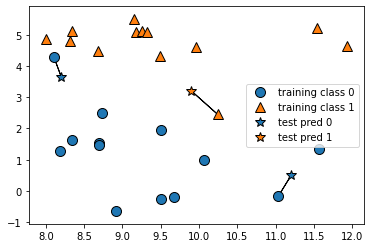

In [21]:
X, y = mglearn.datasets.make_forge()
mglearn.plots.plot_knn_classification(n_neighbors=1)